In [125]:
import matplotlib.pyplot as plt
import numpy as np
import numpy.linalg as la
from functions_parameters.universal_parameters import a, b
from itertools import product

In [126]:
final_result = np.load('u_v1_v2_filling_1_t_4_em4_random_basis_mesh_60_gpu_scaling.npz')


final_ground_state_e_diff_density = final_result['gse']
final_density = final_result['d']
final_bond = final_result['bond']
final_e_difference = final_result['e_diff']
final_c_difference = final_result['c_diff']
final_e_fermi = final_result['e_fermi']
final_iteration = final_result['iters']
any_bi_fail = final_result['any_bi_fail']

u_arr = final_result['u']
v1_arr = u_arr
u_mesh, v1_mesh = np.meshgrid(u_arr, v1_arr, indexing = 'ij')

In [127]:
np.max(final_c_difference)

np.float64(1.566654659257427e-05)

In [128]:
np.max(final_e_difference)

np.float64(9.977559223273147e-09)

### Phase Analysis

In [129]:
from functions_parameters.tools import rot_symm_m_check_d
from functions_parameters.universal_parameters import pauli_matrices

c_6 = np.array([[0,0,1],
               [1,0,0],
               [0,1,0]])
c_3 = c_6@c_6
c_2 = c_6 @ c_3

In [130]:
nematic_phase = ['R symmetric', 'C3 charge nematic', 'C2 charge nematic', 'no R']
Magnetism_phase = [' +', ' FM', ' Ferri', ' AFM']

phase_list_final = list(i+j for i,j in product(nematic_phase, Magnetism_phase))

In [131]:
sorted_ground_state_e_index = np.argsort(final_ground_state_e_diff_density, axis=2)
sorted_ground_state_e= np.take_along_axis(final_ground_state_e_diff_density, sorted_ground_state_e_index, axis=2)
sorted_density = np.take_along_axis(final_density, sorted_ground_state_e_index[:,:,:,np.newaxis,np.newaxis], axis=2)
sorted_e_difference = np.take_along_axis(final_e_difference, sorted_ground_state_e_index, axis=2)
sorted_c_difference = np.take_along_axis(final_c_difference, sorted_ground_state_e_index, axis=2)
sorted_bond = np.take_along_axis(final_bond, sorted_ground_state_e_index[:,:,:,np.newaxis,np.newaxis,np.newaxis,np.newaxis,np.newaxis], axis=2)

In [132]:
threshold = 1E-2

phase_diagram_based_on_d = np.zeros(u_mesh.shape)
gs_m = np.zeros(u_mesh.shape)
gs_n = np.zeros(u_mesh.shape)
for i in range(u_mesh.shape[0]):
    for j in range(u_mesh.shape[1]):
        d_o = sorted_density[i,j,0]
        rs_recording = np.zeros((4))
        m_recording = np.zeros((4))
        c6_diff, c3_diff, c2_diff, magnetism_arr = rot_symm_m_check_d(d_o, c_6, c_3, c_2)
        gs_n[i,j] = c6_diff
        if c6_diff<threshold:
            rs_recording[0] = 1
        elif c6_diff>threshold and c3_diff<threshold:
            rs_recording[1] = 1
        elif c2_diff<threshold and c6_diff>threshold:
            rs_recording[2] = 1
        # else:
        #     rs_recording[3] = 1
        gs_m[i,j] = np.max(np.abs(magnetism_arr))
        if np.max(np.abs(magnetism_arr)) > threshold:
            if np.all(magnetism_arr > threshold) or np.all(magnetism_arr < -threshold):
                m_recording[1] = 1
            else:
                net_m = np.sum(magnetism_arr)
                if np.abs(net_m) < threshold:
                    m_recording[3] = 1
                else:
                    m_recording[2] = 1
        else:
            m_recording[0] = 1
        phase_arr = np.kron(rs_recording,m_recording)
        phase = np.where(phase_arr>0.5)[0][0]
        # it this right???????
        phase_diagram_based_on_d[i,j]=phase

Text(0.5, 1.0, 'filling = 1')

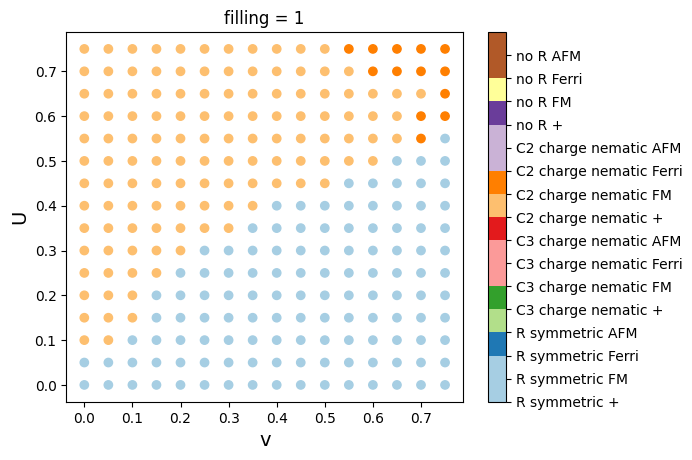

In [133]:
colorbar_ticks_combined = np.arange(len(phase_list_final))
cmap = plt.get_cmap("Paired", len(phase_list_final))
# plt.pcolormesh(e_fermi_mesh, u_mesh, phase_diagram_combined_op.T, cmap="Paired")
plt.scatter(u_mesh, v1_mesh, c=phase_diagram_based_on_d, cmap=cmap,vmin=0, vmax=len(phase_list_final))
# plt.xlabel(r'$E_{f}$', size = '14')
plt.xlabel('v', size = '14')
plt.ylabel('U', size = '14')
# plt.xlim(3.8,6)
colorbar_ticks = np.arange(len(phase_list_final))
cbar = plt.colorbar()
cbar.set_ticks(colorbar_ticks)
cbar.set_ticklabels(phase_list_final)
plt.title('filling = 1')

In [134]:
unique_phase_index = np.unique(phase_diagram_based_on_d)
unique_phase_name = [phase_list_final[i] for i in np.int_(unique_phase_index)]
filtered_phase_diagram = np.zeros(phase_diagram_based_on_d.shape)
for i in range(u_mesh.shape[0]):
    for j in range(u_mesh.shape[1]):
        filtered_phase_diagram[i,j] = np.where(unique_phase_index==phase_diagram_based_on_d[i,j])[0][0]

Text(0.5, 1.0, 'filling = 1')

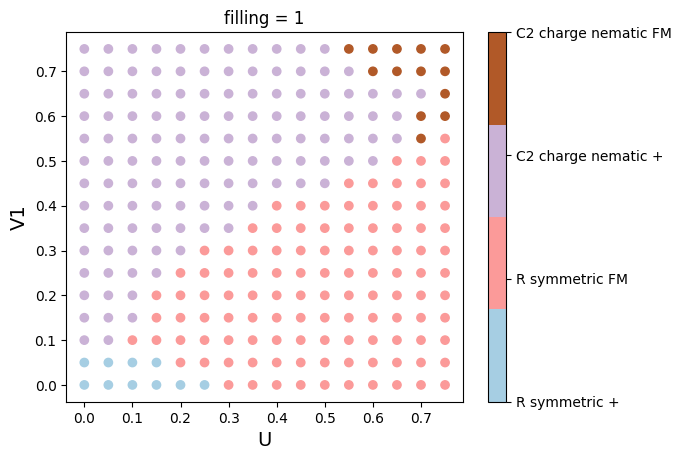

In [135]:
cmap = plt.get_cmap("Paired", len(unique_phase_index))
plt.scatter(u_mesh, v1_mesh, c=filtered_phase_diagram, cmap=cmap)
plt.xlabel('U', size = '14')
plt.ylabel('V1', size = '14')
colorbar_ticks = np.arange(len(unique_phase_index))
cbar = plt.colorbar()
cbar.set_ticks(np.arange(len(unique_phase_index)))
cbar.set_ticklabels(unique_phase_name)
plt.title('filling = 1')

Text(0.5, 1.0, 'filling = 1')

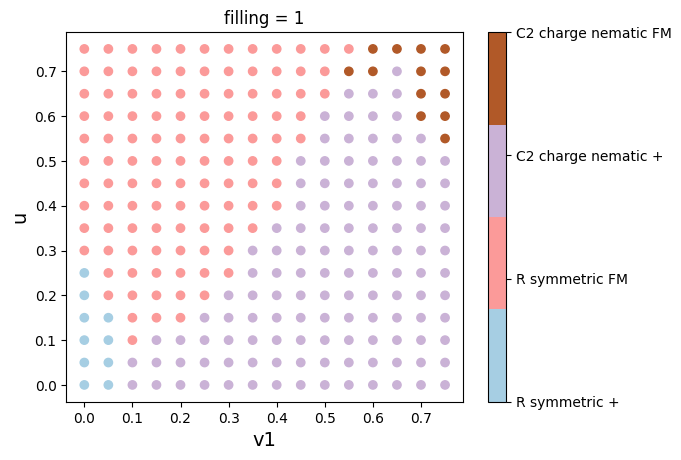

In [136]:
cmap = plt.get_cmap("Paired", len(unique_phase_index))
plt.scatter(v1_mesh, u_mesh, c=filtered_phase_diagram, cmap=cmap)
plt.xlabel('v1', size = '14')
plt.ylabel('u', size = '14')
colorbar_ticks = np.arange(len(unique_phase_index))
cbar = plt.colorbar()
cbar.set_ticks(np.arange(len(unique_phase_index)))
cbar.set_ticklabels(unique_phase_name)
plt.title('filling = 1')

In [137]:
sorted_ground_state_e[-1,-4]

array([-0.14230227, -0.14047672, -0.14047672, -0.14047672, -0.14047482,
       -0.14047482, -0.12755089, -0.12755089, -0.12755089, -0.12508787])

In [138]:
sorted_density[-1,-3,0,0]-sorted_density[-1,-3,0,1]

array([0.26925554-2.62657658e-26j, 0.07773749+6.40157690e-20j,
       0.07711515-5.96428967e-20j])

In [139]:
sorted_density[-1,-3,1,0]-sorted_density[-1,-3,1,1]

array([0.+0.j, 0.+0.j, 0.+0.j])

In [140]:
final_ground_state_e_diff_density[4,-1,0]

np.float64(-0.25734016096252166)

In [141]:
final_density[4,-1,0]

array([[0.04406108-9.18942656e-27j, 0.36528341-2.06617193e-19j,
        0.09065572+9.68560377e-22j],
       [0.04406098-5.56773718e-29j, 0.36528309+3.27058585e-20j,
        0.09065571-7.19503582e-21j]])

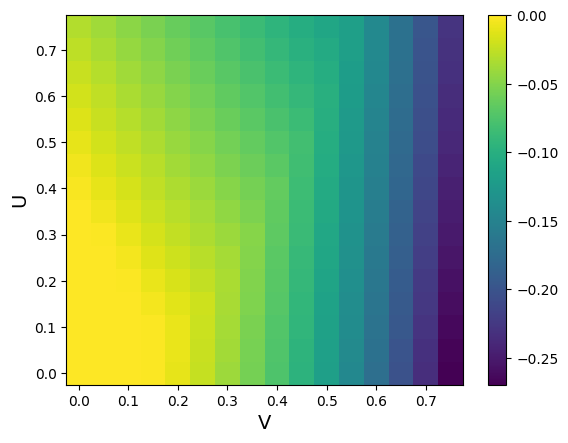

In [142]:
plt.pcolormesh(v1_mesh,u_mesh,sorted_ground_state_e[:,:,0])
plt.xlabel('V', size = '14')
plt.ylabel('U', size = '14')
plt.colorbar()

Text(0.5, 1.0, 'ground state c_6_diff')

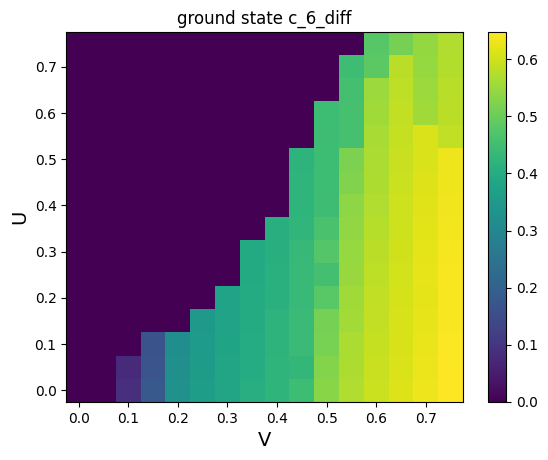

In [143]:
plt.pcolormesh(v1_mesh,u_mesh,gs_n)
plt.xlabel('V', size = '14')
plt.ylabel('U', size = '14')
plt.colorbar()
plt.title('ground state c_6_diff')

Text(0.5, 1.0, 'ground state max magnetization')

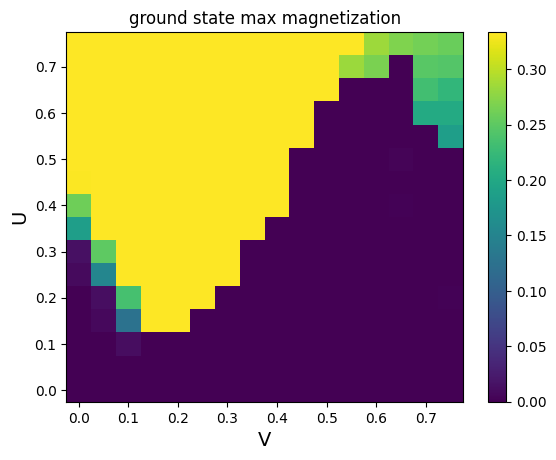

In [144]:
plt.pcolormesh(v1_mesh,u_mesh,gs_m)
plt.xlabel('V', size = '14')
plt.ylabel('U', size = '14')
plt.colorbar()
plt.title('ground state max magnetization')

In [145]:
from functions_parameters.jax_schf_helpers import *
from functions_parameters.bond_table_generator import build_buckets_per_shell

basis_frac = np.array([[1/2, 0], [1/2, 1/2], [0, 1/2]])
norb = basis_frac.shape[0]
num_k_mesh = 60
b_0 = np.linspace(-b[0] / 2, b[0] / 2, num_k_mesh, endpoint=False)
b_1 = np.linspace(-b[1] / 2, b[1] / 2, num_k_mesh, endpoint=False)
k_mesh_points = np.vstack([v1 + v2 for v1, v2 in product(b_0, b_1)])
num_k_points = k_mesh_points.shape[0]

radii, a_lists, deltas = build_buckets_per_shell(a, basis_frac, 2)

# in this case, as both TB model and interaction, we include up to NNN, the a_list and deltas are the same
# calculate the correlation matrix
temperature = 4E-4
filling = 1/2
mu = 2
t_nn = 1
t_nnn = -0.025
t_arr = np.array([t_nn, t_nnn])

phase_pos, phase_neg = precompute_k_phase_tables(deltas, a, k_mesh_points)
Htb, e_all, v_all, v_all_dagger = hk_all_k_from_phases(mu, a_lists, t_arr, phase_neg)

nk = e_all.shape[0]
norb = e_all.shape[1]
e_fermi_iterated, ne, converged, iters = fermi_level_bisection_core(e_all, filling, temperature)
electron_count = occ(e_all, e_fermi_iterated, temperature)
# (U @ diag(electron_count) @ U_d).T
corr_k = jnp.einsum('Nni,Ni,Nim->Nmn', v_all, electron_count, v_all_dagger)
# count the spin degeneracy
gs_e = jnp.einsum('Nji, Nji->', Htb, corr_k)/nk*2

# then obtain the mean field decomposition and corresponding 
bond_ref = bond_orders_from_phases(a_lists, corr_k, phase_neg)
bond_ref = np.stack((bond_ref, bond_ref), axis=1)

bond_difference = final_bond[:,:,0] - bond_ref[np.newaxis,np.newaxis,:]

In [146]:
bond_difference.shape

(16, 16, 9, 2, 2, 3, 3)

In [147]:
bond_difference_ij = np.sqrt(np.sum(np.abs(bond_difference), axis=(2,3,4,5,6)))

Text(0.5, 1.0, 'ground state max magnetization')

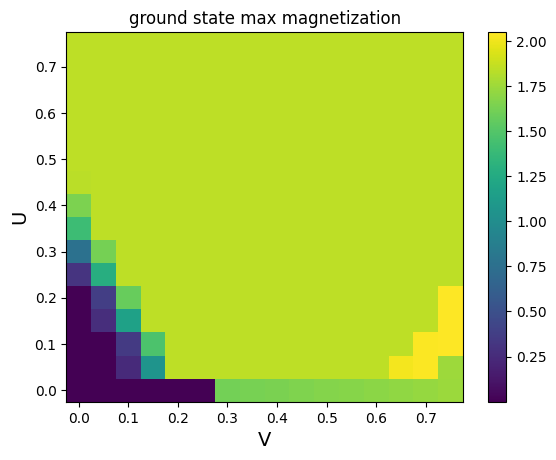

In [148]:
plt.pcolormesh(v1_mesh,u_mesh,bond_difference_ij)
plt.xlabel('V', size = '14')
plt.ylabel('U', size = '14')
plt.colorbar()
plt.title('ground state max magnetization')

## Select states for next run

In [149]:
selected_indexes = [(4,-1,0), (5,-5,0), (-5,-3,0), (-5,-2,0), (0,-1,0), (-2,-3,0), (-1,0,0), (-1,-6,0)]

In [150]:
# first find if there are energy states that are highly degenerate as the known ground state while in the different phase
states_index = np.where(np.logical_and(sorted_ground_state_e - sorted_ground_state_e[:,:,0][:,:,np.newaxis]<1E-4, sorted_ground_state_e - sorted_ground_state_e[:,:,0][:,:,np.newaxis]>1E-7))
# then find out the states that are in a different phase than the known ground state
states_index_len = len(states_index[0])
degenerate_state_diagram = -np.ones(final_c_difference.shape, dtype=np.int32)
for index in range(states_index_len):
    i = states_index[0][index]
    j = states_index[1][index]
    k = states_index[2][index]
    d_o = sorted_density[i,j,k]
    rs_recording = np.zeros((4))
    m_recording = np.zeros((4))
    c6_diff, c3_diff, c2_diff, magnetism_arr = rot_symm_m_check_d(d_o, c_6, c_3, c_2)
    if c6_diff<threshold:
        rs_recording[0] = 1
    elif c6_diff>threshold and c3_diff<threshold:
        rs_recording[1] = 1
    elif c2_diff<threshold and c6_diff>threshold:
        rs_recording[2] = 1
    else:
        rs_recording[3] = 1
    if np.max(np.abs(magnetism_arr)) > threshold:
        if np.all(magnetism_arr > threshold) or np.all(magnetism_arr < -threshold):
            m_recording[1] = 1
        else:
            net_m = np.sum(magnetism_arr)
            if np.abs(net_m) <= magnetism_arr.size * threshold:
                m_recording[3] = 1
            else:
                m_recording[2] = 1
    else:
        m_recording[0] = 1
    phase_arr = np.kron(rs_recording,m_recording)
    phase = np.where(phase_arr>0.5)[0][0]
    if phase != phase_diagram_based_on_d[i,j] and phase not in degenerate_state_diagram[i,j]:
        degenerate_state_diagram[i,j,k]=phase


In [151]:
degenerate_index = np.where(degenerate_state_diagram>0)

In [152]:
degenerate_index

(array([ 2,  2,  3, 10, 11]),
 array([ 2,  2,  5, 15, 14]),
 array([4, 5, 6, 6, 6]))

In [153]:
phase_list_final[np.int32(degenerate_state_diagram[6,7,8])]

'no R AFM'

In [154]:
selected_indexes.append((4,-1,0))

In [155]:
selected_d = np.zeros((len(selected_indexes),2,norb), dtype=np.complex128)
selected_bond = np.zeros((len(selected_indexes),)+sorted_bond[0,0,0].shape, dtype=np.complex128)
count = 0
for index in selected_indexes:
    i = index[0]
    j = index[1]
    k = index[2]
    selected_d[count] = sorted_density[i,j,k]
    selected_bond[count] = sorted_bond[i,j,k]
    count += 1

In [156]:
selected_d.shape

(9, 2, 3)

In [157]:
selected_indexes

[(4, -1, 0),
 (5, -5, 0),
 (-5, -3, 0),
 (-5, -2, 0),
 (0, -1, 0),
 (-2, -3, 0),
 (-1, 0, 0),
 (-1, -6, 0),
 (4, -1, 0)]

In [158]:
i,j,k

(4, -1, 0)

In [159]:
import os

In [160]:
np.savez_compressed("filling_1_rerun_basis_v1_V2.npz",
    d = selected_d,
    bond = selected_bond,
)

In [161]:
selected_d[8]

array([[0.36645908+3.76813053e-36j, 0.09067479+5.20305169e-20j,
        0.04448055-2.12609730e-21j],
       [0.36411753-6.19802685e-37j, 0.09055618-8.11688657e-21j,
        0.04371187-2.23792788e-21j]])

In [162]:
len(states_index[0])

192

In [163]:
sorted_density[-6,-1,0]

array([[0.35843258+3.18913540e-36j, 0.04341349-2.57428058e-20j,
        0.0981553 -7.12400923e-20j],
       [0.35843074+1.84188505e-35j, 0.04341346-1.37215588e-20j,
        0.09815444-2.96282017e-20j]])

In [164]:
sorted_density[-6,-1,0,0] - sorted_density[-6,-1,0,1]

array([1.83712180e-06-1.52297151e-35j, 2.59965056e-08-1.20212469e-20j,
       8.56339767e-07-4.16118905e-20j])

In [165]:
sorted_ground_state_e[5,5]

array([-0.02853509, -0.02853509, -0.02853509, -0.02851731, -0.01824177,
       -0.01824177, -0.01824177, -0.01824177, -0.01739121, -0.01739121])

In [166]:
sorted_ground_state_e[4,5]

array([-0.02436842, -0.02436842, -0.02436842, -0.02435064, -0.01925681,
       -0.01925681, -0.01925681, -0.0192568 , -0.0192568 , -0.01778115])

In [167]:
sorted_density[4,5,0]

array([[3.33333334e-01+2.43397440e-20j, 3.33333334e-01+1.99350069e-19j,
        3.33333332e-01+1.20661593e-19j],
       [8.75651076e-27+7.66618452e-50j, 8.75651076e-27+1.97031608e-45j,
        8.75651076e-27-2.73711809e-45j]])

In [168]:
sorted_density[4,5,6]

array([[0.22499703+7.75438903e-26j, 0.05000703-2.01434929e-20j,
        0.22499594+7.61907594e-20j],
       [0.22499703+7.75438903e-26j, 0.05000703-2.01434929e-20j,
        0.22499594+7.61907594e-20j]])

In [169]:
sorted_ground_state_e_index[4,5]

array([8, 9, 7, 0, 6, 3, 1, 5, 2, 4])

In [170]:
final_bond[4,5,2]

array([[[[[-0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
           -0.        +0.00000000e+00j],
          [ 0.        +0.00000000e+00j, -0.        +0.00000000e+00j,
            0.        +0.00000000e+00j],
          [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        -0.00000000e+00j]],

         [[-0.        +0.00000000e+00j,  0.04964696+9.58208351e-18j,
           -0.        +0.00000000e+00j],
          [ 0.        +0.00000000e+00j, -0.        +0.00000000e+00j,
            0.        +0.00000000e+00j],
          [ 0.        +0.00000000e+00j,  0.05492125-1.18126944e-17j,
            0.        -0.00000000e+00j]]],


        [[[-0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
           -0.        +0.00000000e+00j],
          [ 0.        +0.00000000e+00j, -0.        +0.00000000e+00j,
            0.        +0.00000000e+00j],
          [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
            0.        -0.00000000e+00j]],

  

In [171]:
la.norm(np.abs(final_bond[4,5,4] - final_bond[4,5,2])) 

np.float64(0.7010474140096778)

In [172]:
sorted_density[6,5,0]

array([[3.33333332e-01-1.85799911e-20j, 3.33333334e-01-1.15028045e-19j,
        3.33333334e-01+1.46230272e-19j],
       [8.75651076e-27-4.10925713e-50j, 8.75651076e-27+2.41124797e-45j,
        8.75651076e-27+3.81556102e-45j]])

In [173]:
sorted_ground_state_e[-2,-1]

array([-0.23076825, -0.23076825, -0.23076824, -0.22871964, -0.22871964,
       -0.22871354, -0.22871354, -0.22871354, -0.22871354, -0.14445154])

In [174]:
sorted_density[-2,-1,0]

array([[0.0991556 +6.20575080e-25j, 0.09915519-1.28509391e-20j,
        0.47937557+1.75702261e-20j],
       [0.04332821+1.13106099e-24j, 0.04332793-3.36715868e-20j,
        0.23565751+2.08435761e-19j]])

In [175]:
sorted_density[-2,-1,6]

array([[0.04021844-4.56429634e-26j, 0.10788957+2.77688981e-20j,
        0.35189199+1.09786132e-21j],
       [0.04021844-4.56429634e-26j, 0.10788957+2.77688981e-20j,
        0.35189199+1.09786132e-21j]])

In [176]:
np.mean(final_iteration)

np.float64(79.762890625)

In [177]:
np.max(final_iteration)

np.int32(500)

In [178]:
np.min(final_iteration)

np.int32(2)

### Test the degeneracy of energy